In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.linear_model import SGDClassifier
from math import exp
from random import random

In [2]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [3]:
class MyLogisticRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coefficient_ = []

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000):
        self.coefficient_ = [random() for _ in range(len(x[0]) + 1)]
        for epoch in range(no_epochs):
            for i in range(len(x)):
                y_computed = sigmoid(self.evaluate(x[i], self.coefficient_))
                crt_error = y_computed - y[i]
                for j in range(0, len(x[0])):
                    self.coefficient_[j + 1] = self.coefficient_[j + 1] - learning_rate * crt_error * x[i][j]
                self.coefficient_[0] = self.coefficient_[0] - learning_rate * crt_error * 1
        self.intercept_ = self.coefficient_[0]
        self.coefficient_ = self.coefficient_[1:]

    def evaluate(self, xi, coefficient):
        yi = coefficient[0]
        for j in range(len(xi)):
            yi += coefficient[j + 1] * xi[j]
        return yi

    def predict_one_sample(self, sample_features):
        threshold = 0.5
        coefficients = [self.intercept_] + [c for c in self.coefficient_]
        computed_float_value = self.evaluate(sample_features, coefficients)
        computed01_value = sigmoid(computed_float_value)
        computed_label = 0 if computed01_value < threshold else 1
        return computed_label

    def predict(self, in_test):
        computed_labels = [self.predict_one_sample(sample) for sample in in_test]
        return computed_labels


In [4]:
class MyLogisticRegressionMultipleLabels:

    def __init__(self):
        self.intercept_ = []
        self.coefficient_ = []

    def fit_batch(self, x, y, learning_rate=0.001, no_epochs=1000):
        self.coefficient_ = []
        self.intercept_ = []
        labels = list(set(y))
        for label in labels:
            coefficient = [random() for _ in range(len(x[0]) + 1)]
            for _ in range(no_epochs):
                errors = [0] * len(coefficient)
                for input, output in zip(x, y):
                    y_computed = sigmoid(self.evaluate(input, coefficient))
                    error = y_computed - 1 if output == label else y_computed
                    for i, xi in enumerate([1] + list(input)):
                        errors[i] += error * xi
                for i in range(len(coefficient)):
                    coefficient[i] = coefficient[i] - learning_rate * errors[i]
            self.intercept_.append(coefficient[0])
            self.coefficient_.append(coefficient[1:])

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000):
        self.intercept_ = []
        self.coefficient_ = []
        labels = list(set(y))
        for label in labels:
            coefficient = [random() for _ in range(len(x[0]) + 1)]
            for _ in range(no_epochs):
                for input, output in zip(x, y):
                    y_computed = sigmoid(self.evaluate(input, coefficient))
                    error = y_computed - 1 if output == label else y_computed
                    for j in range(len(x[0])):
                        coefficient[j + 1] = coefficient[j + 1] - learning_rate * error * input[j]
                    coefficient[0] = coefficient[0] - learning_rate * error
            self.intercept_.append(coefficient[0])
            self.coefficient_.append(coefficient[1:])

    def evaluate(self, xi, coefficient):
        yi = coefficient[0]
        for j in range(len(xi)):
            yi += coefficient[j + 1] * xi[j]
        return yi

    def predict_one_sample(self, sample_features):
        predictions = []
        for intercept, coefficient in zip(self.intercept_, self.coefficient_):
            computed_value = self.evaluate(sample_features, [intercept] + coefficient)
            predictions.append(sigmoid(computed_value))
        return predictions.index(max(predictions))

    def predict(self, in_test):
        computed_labels = [self.predict_one_sample(sample) for sample in in_test]
        return computed_labels

In [5]:
def load_data():
    data = load_breast_cancer()
    inputs = data['data']
    outputs = data['target']
    output_names = data['target_names']
    feature_names = list(data['feature_names'])
    feature1 = [feat[feature_names.index('mean radius')] for feat in inputs]
    feature2 = [feat[feature_names.index('mean texture')] for feat in inputs]
    inputs = [[feat[feature_names.index('mean radius')], feat[feature_names.index('mean texture')]] for feat in inputs]
    return inputs, outputs, output_names, feature1, feature2, feature_names[:2]

In [6]:
def plot_data(inputs, outputs, output_names, feature_names, title=None):
    labels = set(outputs)
    no_data = len(inputs)
    for crt_label in labels:
        x = [inputs[i][0] for i in range(no_data) if outputs[i] == crt_label]
        y = [inputs[i][1] for i in range(no_data) if outputs[i] == crt_label]
        plt.scatter(x, y, label=output_names[crt_label])
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.title(title)
    plt.show()


def plot_histogram_feature(feature, variableName):
    plt.hist(feature, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

In [7]:
def train_and_test(inputs, outputs):
    indexes = [i for i in range(len(inputs))]
    train_sample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    test_sample = [i for i in indexes if i not in train_sample]
    train_inputs = [inputs[i] for i in train_sample]
    train_outputs = [outputs[i] for i in train_sample]
    test_inputs = [inputs[i] for i in test_sample]
    test_outputs = [outputs[i] for i in test_sample]
    return train_inputs, train_outputs, test_inputs, test_outputs


def normalisation(train_data, test_data):
    scaler = StandardScaler()
    if not isinstance(train_data[0], list):
        train_data = [[d] for d in train_data]
        test_data = [[d] for d in test_data]
        scaler.fit(train_data)
        normalisedTrainData = scaler.transform(train_data)
        normalisedTestData = scaler.transform(test_data)
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(train_data)
        normalisedTrainData = scaler.transform(train_data)
        normalisedTestData = scaler.transform(test_data)
    return normalisedTrainData, normalisedTestData

In [8]:
def learn_by_tool(train_inputs, train_outputs, test_inputs, test_outputs):
    classifier = linear_model.LogisticRegression()
    classifier.fit(train_inputs, train_outputs)
    w0, w1, w2 = classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1]
    print('Classification model by tool: y =', w0, '+', w1, '* feat1 +', w2, '* feat2')
    computed_outputs = classifier.predict(test_inputs)
    print("Accuracy score:", classifier.score(test_inputs, test_outputs))
    return computed_outputs


def learn_by_me(train_inputs, train_outputs, test_inputs, test_outputs):
    classifier = MyLogisticRegression()
    classifier.fit(train_inputs, train_outputs)
    w0, w1, w2 = classifier.intercept_, classifier.coefficient_[0], classifier.coefficient_[1]
    print('Classification model by me: y =', w0, '+', w1, '* feat1 +', w2, '* feat2')
    computed_outputs = [1 if sigmoid(w0 + w1 * el[0] + w2 * el[1]) > 0.5 else 0 for el in test_inputs]
    no_data = len(test_inputs)
    accuracy = 0.0
    for i in range(no_data):
        if test_outputs[i] == computed_outputs[i]:
            accuracy += 1
    print("Accuracy score:", accuracy / no_data)
    return computed_outputs

In [9]:
def plot_predictions(inputs, real_outputs, computed_outputs, label_names, feature_names, title=None):
    labels = list(set(real_outputs))
    no_data = len(inputs)
    for crt_label in labels:
        x = [inputs[i][0] for i in range(no_data) if real_outputs[i] == crt_label and computed_outputs[i] == crt_label]
        y = [inputs[i][1] for i in range(no_data) if real_outputs[i] == crt_label and computed_outputs[i] == crt_label]
        plt.scatter(x, y, label=label_names[crt_label] + ' (correct)')
    for crt_label in labels:
        x = [inputs[i][0] for i in range(no_data) if real_outputs[i] == crt_label and computed_outputs[i] != crt_label]
        y = [inputs[i][1] for i in range(no_data) if real_outputs[i] == crt_label and computed_outputs[i] != crt_label]
        plt.scatter(x, y, label=label_names[crt_label] + ' (incorrect)')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()


def calculate_performance(computed_outputs, test_outputs, method):
    error = 0.0
    for t1, t2 in zip(computed_outputs, test_outputs):
        if t1 != t2:
            error += 1
    error = error / len(test_outputs)
    print('Classification error by', method, ':', error)


In [10]:
def load_data_flowers():
    data = load_iris()
    inputs = data['data']
    outputs = data['target']
    outputs_name = data['target_names']
    feature_names = list(data['feature_names'])
    feature1 = [feat[feature_names.index('sepal length (cm)')] for feat in inputs]
    feature2 = [feat[feature_names.index('sepal width (cm)')] for feat in inputs]
    feature3 = [feat[feature_names.index('petal length (cm)')] for feat in inputs]
    feature4 = [feat[feature_names.index('petal width (cm)')] for feat in inputs]
    inputs = [[feat[feature_names.index('sepal length (cm)')],
               feat[feature_names.index('sepal width (cm)')],
               feat[feature_names.index('petal length (cm)')],
               feat[feature_names.index('petal width (cm)')]] for feat in inputs]
    return inputs, outputs, outputs_name, feature1, feature2, feature3, feature4, feature_names


def plot_data_four_features(inputs, outputs, output_names, feature_names, title=None):
    x = [i[0] for i in inputs]
    y = [i[1] for i in inputs]
    z = [i[2] for i in inputs]
    v = [i[3] for i in inputs]
    figure = px.scatter_3d(x=x, y=y, z=z, symbol=v, color=outputs, title=title,
                           labels=dict(x=feature_names[0], y=feature_names[1], z=feature_names[2],
                                       symbol=feature_names[3], color="Type"))
    figure.update_layout(legend=dict(orientation="v", yanchor='top', xanchor="right"))
    figure.show()

In [11]:
def learn_by_tool_multi_label(train_inputs, train_outputs, test_inputs, test_outputs):
    classifier = linear_model.LogisticRegression()
    classifier.fit(train_inputs, train_outputs)
    w0, w1, w2, w3, w4 = classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1], classifier.coef_[0][
        2], classifier.coef_[0][3]
    print('Classification model by tool first label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    w0, w1, w2, w3, w4 = classifier.intercept_[1], classifier.coef_[1][0], classifier.coef_[1][1], classifier.coef_[1][
        2], classifier.coef_[1][3]
    print('Classification model by tool second label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    w0, w1, w2, w3, w4 = classifier.intercept_[2], classifier.coef_[2][0], classifier.coef_[2][1], classifier.coef_[2][
        2], classifier.coef_[2][3]
    print('Classification model by tool third label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    computed_outputs = classifier.predict(test_inputs)
    print("Accuracy score:", classifier.score(test_inputs, test_outputs))
    return computed_outputs


def learn_by_me_multi_label(train_inputs, train_outputs, test_inputs, test_outputs):
    classifier = MyLogisticRegressionMultipleLabels()
    classifier.fit_batch(train_inputs, train_outputs)
    w0, w1, w2, w3, w4 = classifier.intercept_[0], classifier.coefficient_[0][0], classifier.coefficient_[
        0][1], classifier.coefficient_[0][2], classifier.coefficient_[0][3]
    print('Classification model by me first label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    w0, w1, w2, w3, w4 = classifier.intercept_[1], classifier.coefficient_[1][0], classifier.coefficient_[
        1][1], classifier.coefficient_[1][2], classifier.coefficient_[1][3]
    print('Classification model by me second label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    w0, w1, w2, w3, w4 = classifier.intercept_[2], classifier.coefficient_[2][0], classifier.coefficient_[
        2][1], classifier.coefficient_[2][2], classifier.coefficient_[2][3]
    print('Classification model by me third label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    computed_outputs = classifier.predict(test_inputs)
    no_data = len(test_inputs)
    accuracy = 0.0
    for i in range(no_data):
        if test_outputs[i] == computed_outputs[i]:
            accuracy += 1
    print("Accuracy score:", accuracy / no_data)
    return computed_outputs

In [12]:
def cross_validation(inputs, outputs):
    indexes = [i for i in range(len(inputs))]
    first_set_index = []
    second_set_index = []
    third_set_index = []
    forth_set_index = []
    fifth_set_index = []
    for i in range(5):
        first_set_index = np.random.choice(indexes, int(0.2 * len(inputs)), replace=False)
        used = list(first_set_index)
        second_set_index = np.random.choice([i for i in indexes if i not in used], int(0.2 * len(inputs)),
                                            replace=False)
        used += list(second_set_index)
        third_set_index = np.random.choice([i for i in indexes if i not in used], int(0.20 * len(inputs)),
                                           replace=False)
        used += list(third_set_index)
        forth_set_index = np.random.choice([i for i in indexes if i not in used], int(0.20 * len(inputs)),
                                           replace=False)
        used += list(forth_set_index)
        fifth_set_index = [i for i in indexes if i not in used]
    first_set = {
        'inputs': [inputs[i] for i in first_set_index],
        'outputs': [outputs[i] for i in first_set_index]
    }
    second_set = {
        'inputs': [inputs[i] for i in second_set_index],
        'outputs': [outputs[i] for i in second_set_index]
    }
    third_set = {
        'inputs': [inputs[i] for i in third_set_index],
        'outputs': [outputs[i] for i in third_set_index]
    }
    forth_set = {
        'inputs': [inputs[i] for i in forth_set_index],
        'outputs': [outputs[i] for i in forth_set_index]
    }
    fifth_set = {
        'inputs': [inputs[i] for i in fifth_set_index],
        'outputs': [outputs[i] for i in fifth_set_index]
    }
    return [first_set, second_set, third_set, forth_set, fifth_set]


def other_loss_function(train_inputs, train_outputs, test_inputs, test_outputs):
    classifier = SGDClassifier(loss='log_loss')
    classifier.fit(train_inputs, train_outputs)
    print('Accuracy score (log loss by tool):', classifier.score(test_inputs, test_outputs))
    classifier = SGDClassifier(loss='hinge')
    classifier.fit(train_inputs, train_outputs)
    print('Accuracy score (hinge loss by tool):', classifier.score(test_inputs, test_outputs))
    classifier = SGDClassifier(loss='squared_hinge')
    classifier.fit(train_inputs, train_outputs)
    print('Accuracy score (squared hinge loss by tool):', classifier.score(test_inputs, test_outputs))


In [13]:
def main_breast_cancer():
    print("Two classes:")
    inputs, outputs, outputNames, feature1, feature2, featureNames = load_data()
    plot_data(inputs, outputs, outputNames, featureNames, "Initial data")
    plot_histogram_feature(feature1, featureNames[0])
    plot_histogram_feature(feature2, featureNames[1])
    plot_histogram_feature(outputs, 'Cancer class')
    trainInputs, trainOutputs, testInputs, testOutputs = train_and_test(inputs, outputs)
    trainInputs, testInputs = normalisation(trainInputs, testInputs)
    plot_data(trainInputs, trainOutputs, outputNames, featureNames, "Normalised data")
    computedTestOutputs = learn_by_tool(trainInputs, trainOutputs, testInputs, testOutputs)
    plot_predictions(testInputs, testOutputs, computedTestOutputs, outputNames, featureNames, "Results by tool")
    calculate_performance(computedTestOutputs, testOutputs, "tool")
    print()
    computedTestOutputs = learn_by_me(trainInputs, trainOutputs, testInputs, testOutputs)
    plot_predictions(testInputs, testOutputs, computedTestOutputs, outputNames, featureNames, "Results by me")
    calculate_performance(computedTestOutputs, testOutputs, "me")

def main_flowers():
    inputs, outputs, outputNames, feature1, feature2, feature3, feature4, featureNames = load_data_flowers()
    plot_data_four_features(inputs, outputs, outputNames, featureNames, "Initial data for flowers")
    plot_histogram_feature(feature1, featureNames[0])
    plot_histogram_feature(feature2, featureNames[1])
    plot_histogram_feature(feature3, featureNames[2])
    plot_histogram_feature(feature4, featureNames[3])
    plot_histogram_feature(outputs, 'Flowers class')
    trainInputs, trainOutputs, testInputs, testOutputs = train_and_test(inputs, outputs)
    trainInputs, testInputs = normalisation(trainInputs, testInputs)
    plot_data_four_features(trainInputs, trainOutputs, outputNames, featureNames, "Normalised flowers' data")
    computedTestOutputs = learn_by_tool_multi_label(trainInputs, trainOutputs, testInputs, testOutputs)
    plot_predictions(testInputs, testOutputs, computedTestOutputs, outputNames, featureNames[:2], "Results by tool")
    calculate_performance(computedTestOutputs, testOutputs, "tool")
    print()
    computedTestOutputs = learn_by_me_multi_label(trainInputs, trainOutputs, testInputs, testOutputs)
    plot_predictions(testInputs, testOutputs, computedTestOutputs, outputNames, featureNames[:2], "Results by me")
    calculate_performance(computedTestOutputs, testOutputs, "me")
    print()
    print("Cross validation:")
    data = cross_validation(inputs, outputs)
    for index in range(5):
        testInputs = data[index]['inputs']
        testOutputs = data[index]['outputs']
        trainInputs = []
        trainOutputs = []
        for dictionary in data[:index] + data[index + 1:]:
            trainInputs += dictionary['inputs']
            trainOutputs += dictionary['outputs']
        trainInputs, testInputs = normalisation(trainInputs, testInputs)
        computedTestOutputs = learn_by_me_multi_label(trainInputs, trainOutputs, testInputs, testOutputs)
        calculate_performance(computedTestOutputs, testOutputs, "me")
        print()
    print("Other loss functions:")
    trainInputs, trainOutputs, testInputs, testOutputs = train_and_test(inputs, outputs)
    trainInputs, testInputs = normalisation(trainInputs, testInputs)
    other_loss_function(trainInputs, trainOutputs, testInputs, testOutputs)


Two classes:


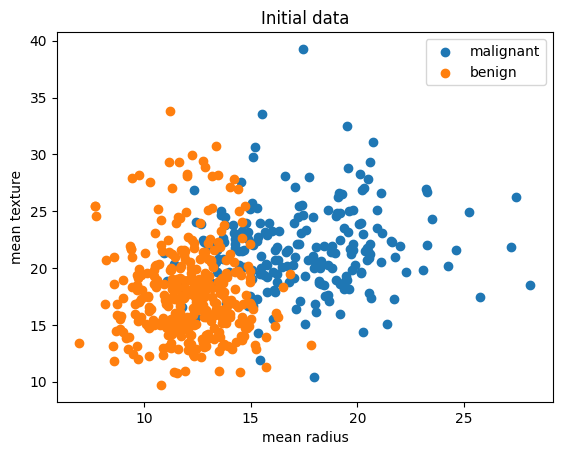

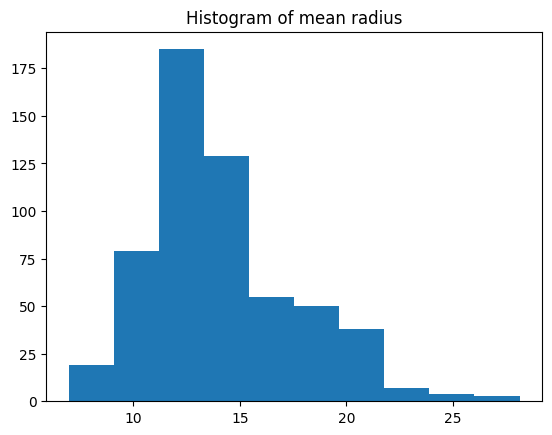

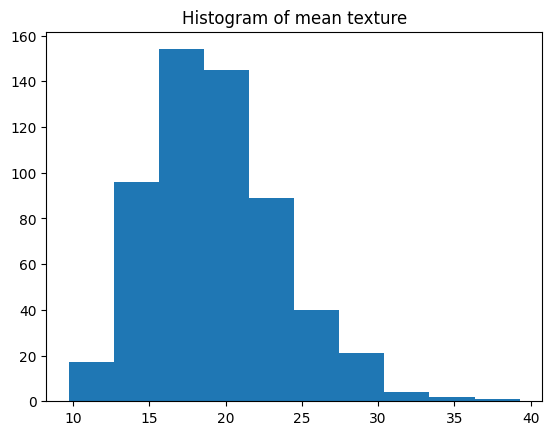

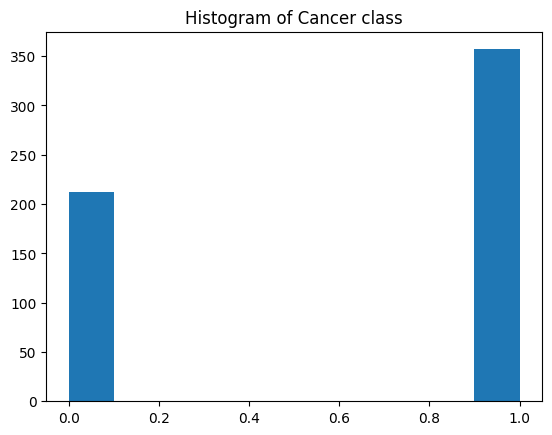

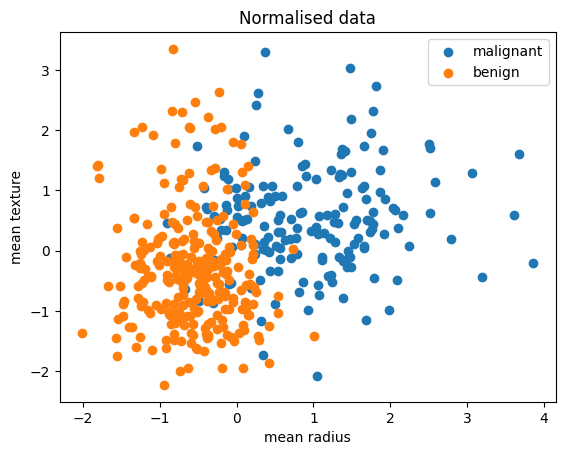

Classification model by tool: y = 0.6181687576743109 + -3.416675868668446 * feat1 + -0.8445959898274961 * feat2
Accuracy score: 0.8771929824561403


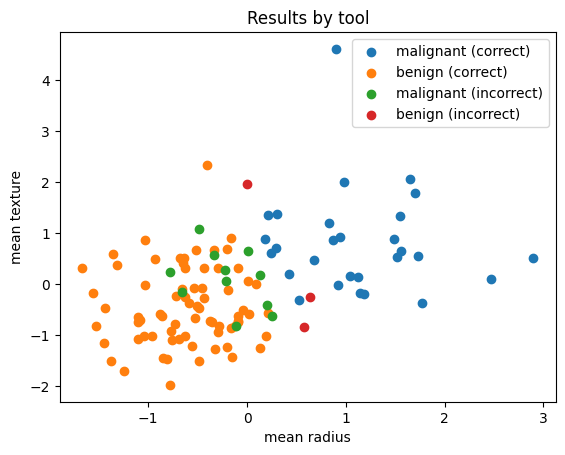

Classification error by tool : 0.12280701754385964

Classification model by me: y = 0.6195290683957235 + -3.936138543416152 * feat1 + -0.9272356267231637 * feat2
Accuracy score: 0.8947368421052632


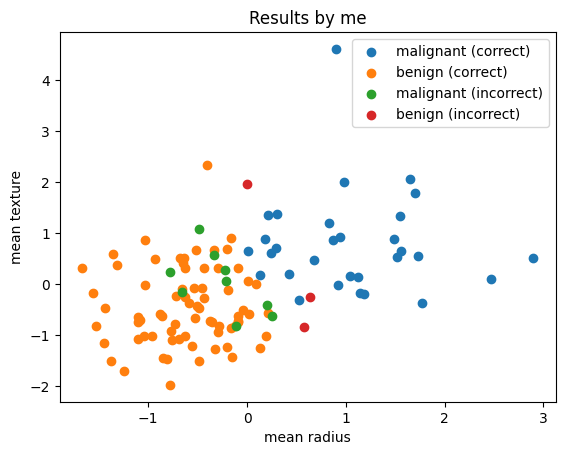

Classification error by me : 0.10526315789473684


In [14]:
main_breast_cancer()

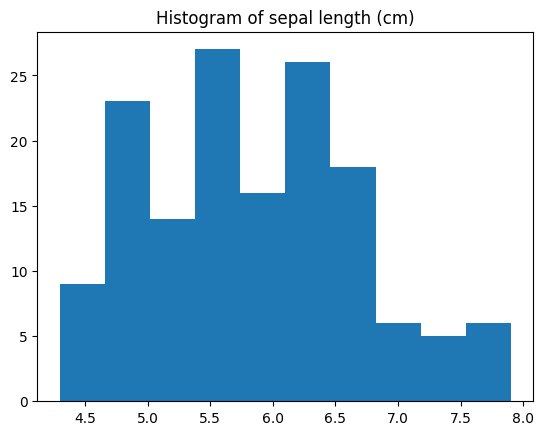

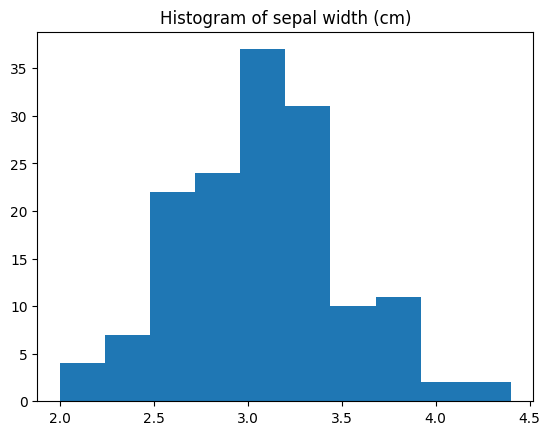

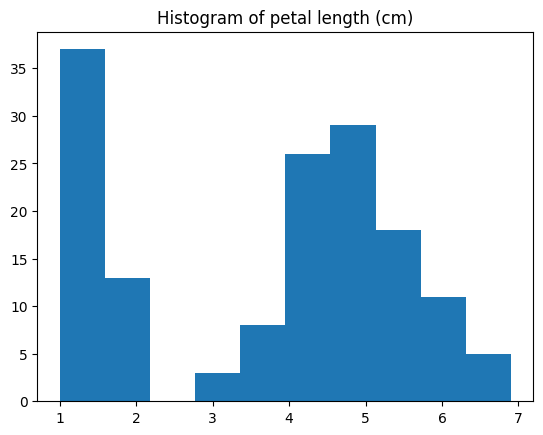

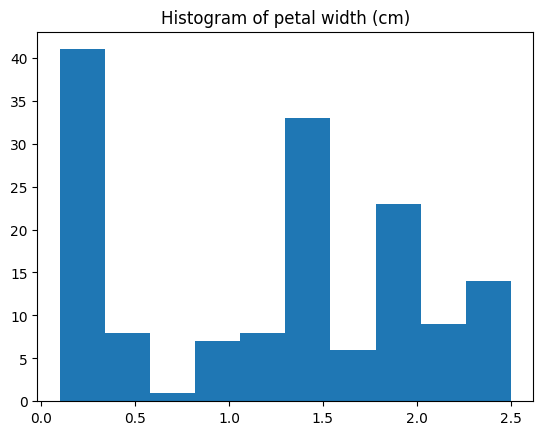

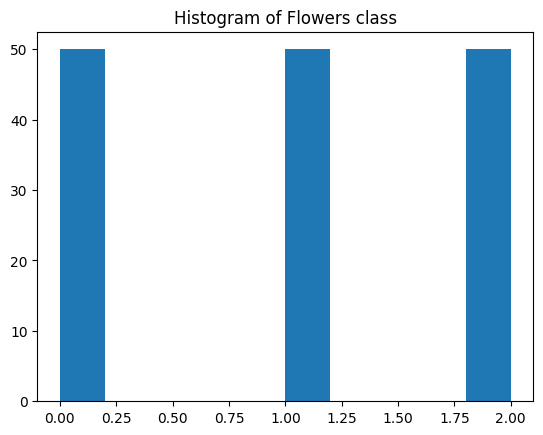

Classification model by tool first label: y = -0.26656813344943225 + -1.0431888352824648 * feat1 + 0.9549697953361411 * feat2 + -1.7839034284640767 * feat3 + -1.6935988542217728 * feat4
Classification model by tool second label: y = 1.9336966040526526 + 0.5241486084719197 * feat1 + -0.4771008594792409 * feat2 + -0.0920998197182451 * feat3 + -0.8380770661521544 * feat4
Classification model by tool third label: y = -1.6671284706032194 + 0.5190402268105448 * feat1 + -0.47786893585689927 * feat2 + 1.8760032481823223 * feat3 + 2.5316759203739267 * feat4
Accuracy score: 0.9


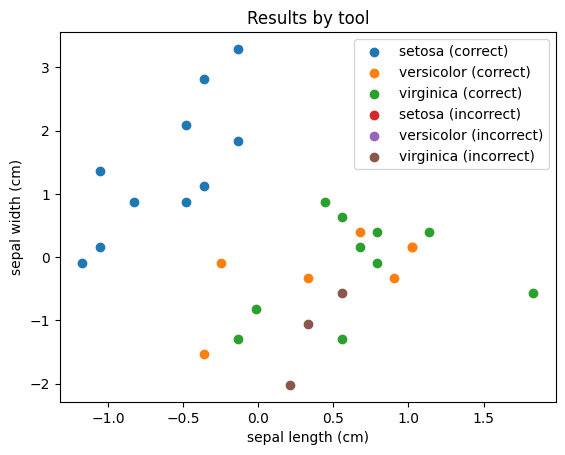

Classification error by tool : 0.1

Classification model by me first label: y = -2.03229512422711 + -1.190305439431309 * feat1 + 1.9486215063913639 * feat2 + -2.4451301759911117 * feat3 + -1.6943902163233242 * feat4
Classification model by me second label: y = -0.8939464637208479 + 0.011615992497046389 * feat1 + -1.6166826735314819 * feat2 + 1.0471173952730748 * feat3 + -1.0529296605572782 * feat4
Classification model by me third label: y = -3.4207705496324694 + -0.02931515632280349 * feat1 + 0.13307478542091752 * feat2 + 2.06241847664456 * feat3 + 3.3668691866220306 * feat4
Accuracy score: 0.8333333333333334


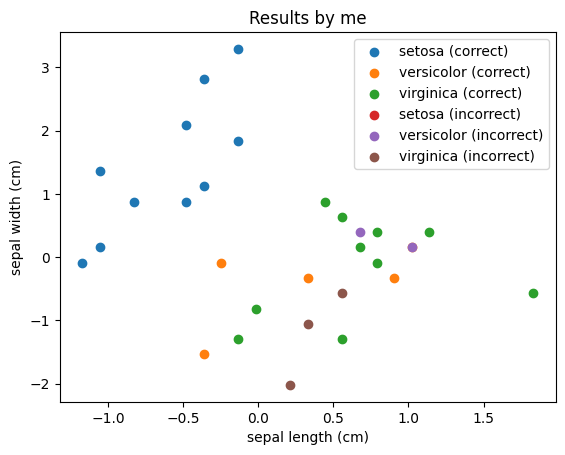

Classification error by me : 0.16666666666666666

Cross validation:
Classification model by me first label: y = -1.8998974185896924 + -1.261586655458312 * feat1 + 1.9758379780396318 * feat2 + -2.1693621512617836 * feat3 + -1.9595500073118568 * feat4
Classification model by me second label: y = -1.1402173862588751 + 0.11838477772895052 * feat1 + -1.557546219623167 * feat2 + 0.8655108322400094 * feat3 + -1.0102067179146794 * feat4
Classification model by me third label: y = -3.3439076385479223 + 0.2651794164171092 * feat1 + 0.07830215449007129 * feat2 + 2.0547133779091546 * feat3 + 3.4180824979014233 * feat4
Accuracy score: 0.8
Classification error by me : 0.2

Classification model by me first label: y = -2.0429442810621214 + -1.1696393163949246 * feat1 + 1.9604647482014212 * feat2 + -2.0091547567675834 * feat3 + -2.0463956578615554 * feat4
Classification model by me second label: y = -0.8809017453315738 + 0.35925706279660174 * feat1 + -1.460889803535347 * feat2 + 0.5084886224982902 * fe

In [16]:
main_flowers()